In [556]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import json
import pprint
import csv
import glob
import os

In [557]:
#Import csv data
diab_hosp_pd = pd.read_csv('Resources/hospitalization.csv') #TRACT_FIPS
diab_hosp_pd = diab_hosp_pd.rename(columns={"TRACT_FIPS": "FIPS"})
diab_adults_pd = pd.read_csv('Resources/inadults.csv') #Census_Tract_FIPS
diab_adults_pd = diab_adults_pd.rename(columns={"Census_Tract_FIPS": "FIPS"})
diab_income_pd = pd.read_csv('Resources/income.csv') #FIPS
diab_food_pd = pd.read_csv('Resources/foodenviro.csv') #FIPS
diab_education_pd = pd.read_csv('Resources/education.csv') #FIPS

#Merge pd data
merged_diabetes_df = pd.merge(diab_hosp_pd, diab_adults_pd, on = "FIPS")
merged_diabetes_df = pd.merge(merged_diabetes_df, diab_income_pd, on = "FIPS")
merged_diabetes_df = pd.merge(merged_diabetes_df, diab_food_pd, on = "FIPS")
merged_diabetes_df = pd.merge(merged_diabetes_df, diab_education_pd, on = "FIPS")
merged_diabetes_df = merged_diabetes_df.dropna()
merged_diabetes_df.to_csv('Resources/merged.csv')
# merged_diabetes_df = merged_diabetes_df.set_index('TRACT_NAME')
merged_diabetes_df.head()

OBJECTID_x        FIPS                                    TRACT_NAME  \
0           1  8043979000   Census Tract 9790, Fremont County, Colorado   
1           2  8045951600  Census Tract 9516, Garfield County, Colorado   
2           3  8069002803  Census Tract 28.03, Larimer County, Colorado   
3           4  8125963200      Census Tract 9632, Yuma County, Colorado   
4           5  8069002401  Census Tract 24.01, Larimer County, Colorado   

  COUNTY_NAME  DIABETES_ADJRATE  DIABETES_L95CI  DIABETES_U95CI  \
0     FREMONT            716.97          569.52          864.42   
1    GARFIELD            602.99          495.07          710.91   
2     LARIMER              0.00            0.00            0.00   
3        YUMA           1390.98         1268.46         1513.50   
4     LARIMER            529.77          370.49          689.05   

   DIABETES_STATEADJRATE  DIABETES_SL95CI  DIABETES_SU95CI  ...  \
0                1267.78          1263.64          1271.91  ...   
1                1267.78          1263.64          1271.91  ...   
2                1267.78          1263.64          1271.91  ...   
3                1267.78          1263.64          1271.91  ...   
4                1267.78          1263.64          1271.91  ...   

                                   Tract_Name_y  Tract_FIPS_y    County  \
0   Census Tract 9790, Fremont County, Colorado    8043979000   FREMONT   
1  Census Tract 9516, Garfield County, Colorado    8045951600  GARFIELD   
2  Census Tract 28.03, Larimer County, Colorado    8069002803   LARIMER   
3      Census Tract 9632, Yuma County, Colorado    8125963200      YUMA   
4  Census Tract 24.01, Larimer County, Colorado    8069002401   LARIMER   

  Population_Total_y  Population_Density_PerLandSquareMile_y  \
0               3471                                     3.4   
1               3656                                     6.4   
2                 97                                     0.4   
3               5467                                     5.3   
4               1310                                     3.3   

   Education_Population_AgeOver24  \
0                            2876   
1                            2372   
2                              45   
3                            3878   
4                            1179   

   Percent_Education_Population_AgeOver24_LessThan9th  \
0                                                2.1    
1                                                4.3    
2                                                0.0    
3                                                9.7    
4                                                0.8    

  Percent_Education_Population_AgeOver24_NoHSDiploma  \
0                                                6.3   
1                                               11.3   
2                                                0.0   
3                                               15.9   
4                                                5.0   

  Percent_Education_Population_AgeOver24_HSD_Higher  \
0                                              93.7   
1                                              88.7   
2                                             100.0   
3                                              84.0   
4                                              95.1   

  Percent_Education_Population_AgeOver24_Bachelors_Higher  
0                                               26.1       
1                                               45.2       
2                                               51.1       
3                                               22.2       
4                                               46.3       

[5 rows x 98 columns]

Definitions from the USDA Food Environment File

LI = low income
LA = low access

Low-income and low-access tract measured at 1 mile and 10 miles
Definition: A low-income tract with at least 500 people, or 33 percent of the population, living more than 1 mile (urban areas) or more than 10 miles (rural areas) from the nearest supermarket, supercenter, or large grocery store.

Low-income and low-access tract measured at 1 and 20 miles
Definition: A low-income tract with at least 500 people, or 33 percent of the population, living more than 1 mile (urban areas) or more than 20 miles (rural areas) from the nearest supermarket, supercenter, or large grocery store.

Low-income and low-access tract using vehicle access and at 20 miles
Definition: A low-income tract in which at least one of the following is true: at least 100 households are located more than ½ mile from the nearest supermarket and have no vehicle access; or at least 500 people, or 33 percent of the population, live more than 20 miles from the nearest supermarket, regardless of vehicle availability.

In [558]:
narrowed_diab_df = merged_diabetes_df[['FIPS','COUNTY_NAME', 'DIABETES_ADJRATE', 'DIABETES_STATEADJRATE',
                    'Adult_Population_Age18_and_over', 'Diabetes_Census_Tract_Estimate', 
                    'Population_Total_y', 'Population_Density_PerLandSquareMile_y',
                    'Percent_Poverty_AllPeople_Income_Below_Pov_Level', 'Poverty_Median_Household_Income', 
                    'Poverty_Mean_Household_Income', 'Poverty_Per_Capita_Income', 'LILATracts_1And10', 
                                       'LILATracts_halfAnd10', 'LILATracts_1And20', 
                                       'LILATracts_Vehicle', 'Urban', 'Rural', 'LowIncomeTracts', 'Percent_Education_Population_AgeOver24_LessThan9th',
                                      'Percent_Education_Population_AgeOver24_NoHSDiploma', 'Percent_Education_Population_AgeOver24_HSD_Higher',
                                      'Percent_Education_Population_AgeOver24_Bachelors_Higher']]

narrowed_diab_df = narrowed_diab_df.rename(columns={'FIPS':'Census Tract','COUNTY_NAME':'County', 'DIABETES_ADJRATE':'Hospitalization_Census_Tract_Rate_per_100,000',
                                                    'DIABETES_STATEADJRATE':'Hospitlization_State_Rate_per_100,000',
                                                    'Adult_Population_Age18_and_over':'Adult_Pop_Over_18', 
                                                    'Diabetes_Census_Tract_Estimate':'Census_Tract_Estimate', 
                                                    'Population_Total_y':'Pop_Total', 
                                                    'Population_Density_PerLandSquareMile_y':'Pop_Density/Sq_Mile',
                                                    'Percent_Poverty_AllPeople_Income_Below_Pov_Level': 'Percent_Poverty', 
                                                    'Poverty_Median_Household_Income': 'Median_Household_Income',
                                                    'Poverty_Per_Capita_Income': 'Per_Capita_Income', 
                                                    'Urban': 'Urban', 'Rural':'Rural', 'LowIncomeTracts': 'Low_Income_Tract'})


narrowed_diab_df.to_csv('Resources/narrowed.csv')
narrowed_diab_df.head()

Census Tract    County  Hospitalization_Census_Tract_Rate_per_100,000  \
0    8043979000   FREMONT                                         716.97   
1    8045951600  GARFIELD                                         602.99   
2    8069002803   LARIMER                                           0.00   
3    8125963200      YUMA                                        1390.98   
4    8069002401   LARIMER                                         529.77   

   Hospitlization_State_Rate_per_100,000  Adult_Pop_Over_18  \
0                                1267.78               2994   
1                                1267.78               2800   
2                                1267.78                 97   
3                                1267.78               4381   
4                                1267.78               1190   

   Census_Tract_Estimate  Pop_Total  Pop_Density/Sq_Mile  Percent_Poverty  \
0                   10.0       3471                  3.4              9.7   
1                    5.0       3656                  6.4             14.5   
2                    1.6         97                  0.4             38.1   
3                    8.0       5467                  5.3             13.4   
4                    8.0       1310                  3.3             10.2   

   Median_Household_Income  ...  LILATracts_halfAnd10  LILATracts_1And20  \
0                  49483.0  ...                     1                  0   
1                  59154.0  ...                     0                  0   
2                  43882.0  ...                     0                  0   
3                  44315.0  ...                     1                  0   
4                  61111.0  ...                     1                  1   

   LILATracts_Vehicle  Urban  Rural  Low_Income_Tract  \
0                   0      0      1                 1   
1                   0      0      1                 0   
2                   0      0      1                 0   
3                   0      0      1                 1   
4                   1      0      1                 1   

   Percent_Education_Population_AgeOver24_LessThan9th  \
0                                                2.1    
1                                                4.3    
2                                                0.0    
3                                                9.7    
4                                                0.8    

   Percent_Education_Population_AgeOver24_NoHSDiploma  \
0                                                6.3    
1                                               11.3    
2                                                0.0    
3                                               15.9    
4                                                5.0    

   Percent_Education_Population_AgeOver24_HSD_Higher  \
0                                               93.7   
1                                               88.7   
2                                              100.0   
3                                               84.0   
4                                               95.1   

   Percent_Education_Population_AgeOver24_Bachelors_Higher  
0                                               26.1        
1                                               45.2        
2                                               51.1        
3                                               22.2        
4                                               46.3        

[5 rows x 23 columns]

In [559]:
#count number of rows/entries in cleaned dataframe for summary purposes
total_rows = len(narrowed_diab_df)
#describe the dataset
narrowed_diab_df.describe()

Census Tract  Hospitalization_Census_Tract_Rate_per_100,000  \
count  1.228000e+03                                    1228.000000   
mean   8.046881e+09                                    1438.238143   
std    3.588233e+07                                     962.809027   
min    8.001008e+09                                       0.000000   
25%    8.013014e+09                                     805.495000   
50%    8.041003e+09                                    1208.445000   
75%    8.069001e+09                                    1842.957500   
max    8.125963e+09                                   13651.050000   

       Hospitlization_State_Rate_per_100,000  Adult_Pop_Over_18  \
count                           1.228000e+03        1228.000000   
mean                            1.267780e+03        3377.361564   
std                             2.297410e-11        1450.809429   
min                             1.267780e+03          97.000000   
25%                             1.267780e+03        2351.000000   
50%                             1.267780e+03        3227.000000   
75%                             1.267780e+03        4212.000000   
max                             1.267780e+03       12137.000000   

       Census_Tract_Estimate     Pop_Total  Pop_Density/Sq_Mile  \
count            1228.000000   1228.000000          1228.000000   
mean                7.018648   4393.978013          3622.958469   
std                 2.896211   1999.258235          3590.898384   
min                 0.400000     97.000000             0.300000   
25%                 5.200000   3022.000000           461.625000   
50%                 6.600000   4182.500000          3145.800000   
75%                 8.200000   5501.250000          5531.325000   
max                24.500000  15869.000000         37800.000000   

       Percent_Poverty  Median_Household_Income  \
count      1228.000000              1228.000000   
mean         12.116531             69648.009772   
std           9.514684             28880.830704   
min           0.000000              9578.000000   
25%           5.200000             48146.000000   
50%           9.650000             63714.500000   
75%          16.600000             86592.000000   
max          80.600000            211500.000000   

       Poverty_Mean_Household_Income  ...  LILATracts_halfAnd10  \
count                    1228.000000  ...           1228.000000   
mean                    87190.642508  ...              0.321661   
std                     36730.023608  ...              0.467304   
min                     14461.000000  ...              0.000000   
25%                     61371.250000  ...              0.000000   
50%                     79026.500000  ...              0.000000   
75%                    105411.500000  ...              1.000000   
max                    370179.000000  ...              1.000000   

       LILATracts_1And20  LILATracts_Vehicle        Urban        Rural  \
count        1228.000000         1228.000000  1228.000000  1228.000000   
mean            0.131107            0.127850     0.785016     0.214984   
std             0.337655            0.334059     0.410978     0.410978   
min             0.000000            0.000000     0.000000     0.000000   
25%             0.000000            0.000000     1.000000     0.000000   
50%             0.000000            0.000000     1.000000     0.000000   
75%             0.000000            0.000000     1.000000     0.000000   
max             1.000000            1.000000     1.000000     1.000000   

       Low_Income_Tract  Percent_Education_Population_AgeOver24_LessThan9th  \
count       1228.000000                                        1228.000000    
mean           0.386808                                           3.765961    
std            0.487217                                           4.866700    
min            0.000000                                           0.000000    
25%            0.000000                   

In [560]:
narrowed_diab_rural = narrowed_diab_df[narrowed_diab_df["Rural"]== 1]
total_rows_rural = len(narrowed_diab_rural)
narrowed_diab_rural.describe()

Census Tract  Hospitalization_Census_Tract_Rate_per_100,000  \
count  2.640000e+02                                     264.000000   
mean   8.065283e+09                                     868.816705   
std    3.697412e+07                                     511.079433   
min    8.001008e+09                                       0.000000   
25%    8.037000e+09                                     536.120000   
50%    8.063962e+09                                     788.915000   
75%    8.097000e+09                                    1121.617500   
max    8.125963e+09                                    3783.810000   

       Hospitlization_State_Rate_per_100,000  Adult_Pop_Over_18  \
count                           2.640000e+02         264.000000   
mean                            1.267780e+03        3033.780303   
std                             5.239527e-12        1773.268301   
min                             1.267780e+03          97.000000   
25%                             1.267780e+03        1658.750000   
50%                             1.267780e+03        2809.500000   
75%                             1.267780e+03        3985.250000   
max                             1.267780e+03       12137.000000   

       Census_Tract_Estimate     Pop_Total  Pop_Density/Sq_Mile  \
count             264.000000    264.000000           264.000000   
mean                7.355682   3924.848485           113.295455   
std                 3.826668   2391.926352           198.661432   
min                 1.000000     97.000000             0.300000   
25%                 5.000000   2115.250000             5.400000   
50%                 6.900000   3511.500000            29.800000   
75%                 9.200000   5149.000000           127.550000   
max                24.400000  15869.000000          1267.400000   

       Percent_Poverty  Median_Household_Income  \
count       264.000000               264.000000   
mean          9.831439             71591.314394   
std           6.586202             26939.972145   
min           0.000000             22788.000000   
25%           4.975000             50339.500000   
50%           8.850000             65724.500000   
75%          12.725000             89308.750000   
max          39.200000            173000.000000   

       Poverty_Mean_Household_Income  ...  LILATracts_halfAnd10  \
count                     264.000000  ...            264.000000   
mean                    90602.803030  ...              0.125000   
std                     33606.497569  ...              0.331347   
min                     34316.000000  ...              0.000000   
25%                     65107.250000  ...              0.000000   
50%                     83374.500000  ...              0.000000   
75%                    108901.750000  ...              0.000000   
max                    248512.000000  ...              1.000000   

       LILATracts_1And20  LILATracts_Vehicle  Urban  Rural  Low_Income_Tract  \
count         264.000000          264.000000  264.0  264.0        264.000000   
mean            0.034091            0.049242    0.0    1.0          0.257576   
std             0.181807            0.216785    0.0    0.0          0.438130   
min             0.000000            0.000000    0.0    1.0          0.000000   
25%             0.000000            0.000000    0.0    1.0          0.000000   
50%             0.000000            0.000000    0.0    1.0          0.000000   
75%             0.000000            0.000000    0.0    1.0          1.000000   
max             1.000000            1.000000    0.0    1.0          1.000000   

       Percent_Education_Population_AgeOver24_LessThan9th  \
count                                         264.000000    
mean                                            2.883712    
std                                             3.294990    
min                                             0.000000    
25%                                             0.700000    
50%              

In [561]:
narrowed_diab_urban = narrowed_diab_df[narrowed_diab_df["Urban"]== 1]
total_rows_urban = len(narrowed_diab_urban)
narrowed_diab_urban.describe()

Census Tract  Hospitalization_Census_Tract_Rate_per_100,000  \
count  9.640000e+02                                     964.000000   
mean   8.041842e+09                                    1594.179284   
std    3.389545e+07                                     998.281263   
min    8.001008e+09                                      46.710000   
25%    8.013012e+09                                     915.567500   
50%    8.035014e+09                                    1371.610000   
75%    8.059012e+09                                    2009.562500   
max    8.123002e+09                                   13651.050000   

       Hospitlization_State_Rate_per_100,000  Adult_Pop_Over_18  \
count                           9.640000e+02         964.000000   
mean                            1.267780e+03        3471.454357   
std                             2.161171e-11        1334.870884   
min                             1.267780e+03         605.000000   
25%                             1.267780e+03        2536.750000   
50%                             1.267780e+03        3364.000000   
75%                             1.267780e+03        4268.500000   
max                             1.267780e+03        9803.000000   

       Census_Tract_Estimate     Pop_Total  Pop_Density/Sq_Mile  \
count             964.000000    964.000000           964.000000   
mean                6.926349   4522.453320          4584.110996   
std                 2.578510   1858.337461          3480.966777   
min                 0.400000   1007.000000             6.400000   
25%                 5.200000   3239.000000          2208.200000   
50%                 6.600000   4348.500000          4145.700000   
75%                 8.000000   5564.000000          6247.725000   
max                24.500000  14728.000000         37800.000000   

       Percent_Poverty  Median_Household_Income  \
count       964.000000               964.000000   
mean         12.742324             69115.818465   
std          10.083497             29380.911943   
min           0.000000              9578.000000   
25%           5.200000             47690.500000   
50%          10.050000             63302.500000   
75%          17.700000             86019.250000   
max          80.600000            211500.000000   

       Poverty_Mean_Household_Income  ...  LILATracts_halfAnd10  \
count                     964.000000  ...            964.000000   
mean                    86256.191909  ...              0.375519   
std                     37502.403069  ...              0.484508   
min                     14461.000000  ...              0.000000   
25%                     59843.500000  ...              0.000000   
50%                     78006.500000  ...              0.000000   
75%                    103869.000000  ...              1.000000   
max                    370179.000000  ...              1.000000   

       LILATracts_1And20  LILATracts_Vehicle  Urban  Rural  Low_Income_Tract  \
count         964.000000          964.000000  964.0  964.0        964.000000   
mean            0.157676            0.149378    1.0    0.0          0.422199   
std             0.364626            0.356645    0.0    0.0          0.494166   
min             0.000000            0.000000    1.0    0.0          0.000000   
25%             0.000000            0.000000    1.0    0.0          0.000000   
50%             0.000000            0.000000    1.0    0.0          0.000000   
75%             0.000000            0.000000    1.0    0.0          1.000000   
max             1.000000            1.000000    1.0    0.0          1.000000   

       Percent_Education_Population_AgeOver24_LessThan9th  \
count                                         964.000000    
mean                                            4.007573    
std                                             5.190461    
min                                             0.000000    
25%                                             0.700000    
50%              

In [562]:
#summary stats for rural tracts  Mean Household Income by county

mean=narrowed_diab_rural[['County', 'Poverty_Mean_Household_Income']].groupby('County').mean()['Poverty_Mean_Household_Income']
median=narrowed_diab_rural[['County', 'Poverty_Mean_Household_Income']].groupby('County').median()['Poverty_Mean_Household_Income']
std=narrowed_diab_rural[['County', 'Poverty_Mean_Household_Income']].groupby('County').std()['Poverty_Mean_Household_Income']
sem=narrowed_diab_rural[['County', 'Poverty_Mean_Household_Income']].groupby('County').sem()['Poverty_Mean_Household_Income']

statistics_dict_mean_income={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_mean_income)
summary_statistics

mean_hhinc_rural=narrowed_diab_rural.groupby('County').agg({'Poverty_Mean_Household_Income':['mean', 'median', 'std', 'sem']})
mean_hhinc_rural

Poverty_Mean_Household_Income                                      
                                    mean    median           std           sem
County                                                                        
ADAMS                      103145.333333   98507.0  25264.207026  10314.069328
ALAMOSA                     59549.000000   59549.0   3266.833329   2310.000000
ARAPAHOE                   107750.500000  108158.0   9416.262183   3844.172939
ARCHULETA                   71209.000000   69127.0  12877.850908   7435.030688
BACA                        51041.000000   51041.0    963.079436    681.000000
...                                  ...       ...           ...           ...
SUMMIT                      91143.000000   96635.5  14276.907158   7138.453579
TELLER                      69339.000000   65135.5  16246.067155   8123.033577
WASHINGTON                  64791.500000   64791.5   8799.943892   6222.500000
WELD                       100275.120000   97190.0  28255.635916   5651.127183
YUMA                        60985.500000   60985.5  10969.347497   7756.500000

[61 rows x 4 columns]

In [563]:
#summary stats for urban tracts Mean Household Income by county

mean=narrowed_diab_urban[['County', 'Poverty_Mean_Household_Income']].groupby('County').mean()['Poverty_Mean_Household_Income']
median=narrowed_diab_urban[['County', 'Poverty_Mean_Household_Income']].groupby('County').median()['Poverty_Mean_Household_Income']
std=narrowed_diab_urban[['County', 'Poverty_Mean_Household_Income']].groupby('County').std()['Poverty_Mean_Household_Income']
sem=narrowed_diab_urban[['County', 'Poverty_Mean_Household_Income']].groupby('County').sem()['Poverty_Mean_Household_Income']

statistics_dict_mean_income={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_mean_income)
summary_statistics

mean_hhinc_urban=narrowed_diab_urban.groupby('County').agg({'Poverty_Mean_Household_Income':['mean', 'median', 'std', 'sem']})
mean_hhinc_urban

Poverty_Mean_Household_Income                                      
                                    mean    median           std           sem
County                                                                        
ADAMS                       75934.977778   69681.0  25054.246735   2640.949491
ALAMOSA                     45895.000000   45895.0  10920.557129   7722.000000
ARAPAHOE                    96740.237410   81791.0  48734.395756   4133.597497
ARCHULETA                   57864.000000   57864.0           NaN           NaN
BOULDER                    103353.379310  102849.5  34952.911039   4589.542067
BROOMFIELD                 110733.066667   98171.0  37825.288609   9766.447523
CHAFFEE                     62768.500000   62768.5  11161.680541   7892.500000
DELTA                       49745.000000   49745.0           NaN           NaN
DENVER                      87436.225352   76890.0  41514.813103   3483.845725
DOUGLAS                    133125.804348  131902.5  31692.592519   4672.817837
EAGLE                      116633.500000  110280.0  24861.481714  12430.740857
EL PASO                     75722.044643   69313.5  28982.028405   2738.544273
FREMONT                     59509.625000   55346.0  16705.723185   5906.365074
GARFIELD                    84584.000000   87931.0  17388.317443   7776.291963
GUNNISON                    46717.000000   46717.0           NaN           NaN
HUERFANO                    39963.000000   39963.0           NaN           NaN
JEFFERSON                   93749.188525   90629.0  28220.230712   2554.939641
LA PLATA                    81319.750000   81535.5   3779.004840   1889.502420
LAKE                        62017.000000   62017.0   3542.604974   2505.000000
LARIMER                     79126.500000   74083.0  25539.773943   3297.170638
LAS ANIMAS                  48008.000000   46913.0   2984.181462   1722.917971
LOGAN                       46901.000000   46901.0   8003.034549   5659.000000
MESA                        61023.304348   58927.0  18745.438227   3908.694068
MOFFAT                      71192.333333   64357.0  15474.028090   8933.934283
MONTEZUMA                   42669.000000   42669.0           NaN           NaN
MONTROSE                    54699.750000   54836.0   5231.502485   2615.751242
MORGAN                      59288.500000   60454.0   3537.554475   1768.777238
OTERO                       43482.000000   39317.0   7796.104861   4501.083240
PITKIN                     137043.000000  137043.0           NaN           NaN
PROWERS                     46497.500000   46497.5   8436.491006   5965.500000
PUEBLO                      55358.956522   48842.0  22076.162185   3254.952537
RIO GRANDE                  47934.000000   47934.0           NaN           NaN
ROUTT                       98417.000000   98417.0  20101.631576  14214.000000
SUMMIT                     100601.000000  100601.0           NaN           NaN
TELLER                      79716.500000   79716.5  22049.710758  15591.500000
WELD                        78765.215686   74037.0  28675.400018   4015.359155

In [564]:
#Summary stats for Census_Tract_Estimate rural by county

mean_hosp=narrowed_diab_rural[['County', 'Census_Tract_Estimate']].groupby('County').mean()['Census_Tract_Estimate']
median_hosp=narrowed_diab_rural[['County', 'Census_Tract_Estimate']].groupby('County').median()['Census_Tract_Estimate']
std_hosp=narrowed_diab_rural[['County', 'Census_Tract_Estimate']].groupby('County').std()['Census_Tract_Estimate']
sem_hosp=narrowed_diab_rural[['County', 'Census_Tract_Estimate']].groupby('County').sem()['Census_Tract_Estimate']

statistics_dict_census_diab={
        'Mean_census_diab' : mean,
        'Median_census_diab' : median,
        'Standard_census_diab': std,
        'Standard_Error_Mean_census_diab': sem
}

summary_statistics_census_diab=pd.DataFrame(statistics_dict_census_diab)

summary_rural_df=narrowed_diab_rural.groupby('County').agg({'Census_Tract_Estimate':['mean', 'median', 'std', 'sem']})
summary_rural_df

Census_Tract_Estimate                           
                            mean median       std       sem
County                                                     
ADAMS                   8.283333   8.25  0.549242  0.224227
ALAMOSA                 6.250000   6.25  1.343503  0.950000
ARAPAHOE                6.833333   7.10  1.211060  0.494413
ARCHULETA               4.266667   3.90  1.289703  0.744610
BACA                   15.750000  15.75  1.060660  0.750000
...                          ...    ...       ...       ...
SUMMIT                  3.400000   3.25  0.804156  0.402078
TELLER                  7.350000   7.30  0.420317  0.210159
WASHINGTON              9.550000   9.55  0.919239  0.650000
WELD                    7.420000   7.30  0.942072  0.188414
YUMA                    7.900000   7.90  0.141421  0.100000

[61 rows x 4 columns]

In [565]:
#Summary stats for Census_Tract_Estimate urban by county

mean_hosp=narrowed_diab_urban[['County', 'Census_Tract_Estimate']].groupby('County').mean()['Census_Tract_Estimate']
median_hosp=narrowed_diab_urban[['County', 'Census_Tract_Estimate']].groupby('County').median()['Census_Tract_Estimate']
std_hosp=narrowed_diab_urban[['County', 'Census_Tract_Estimate']].groupby('County').std()['Census_Tract_Estimate']
sem_hosp=narrowed_diab_urban[['County', 'Census_Tract_Estimate']].groupby('County').sem()['Census_Tract_Estimate']

statistics_dict_census_diab={
        'Mean_census_diab' : mean,
        'Median_census_diab' : median,
        'Standard_census_diab': std,
        'Standard_Error_Mean_census_diab': sem
}

summary_statistics_census_diab=pd.DataFrame(statistics_dict_census_diab)

summary_urban_df=narrowed_diab_urban.groupby('County').agg({'Census_Tract_Estimate':['mean', 'median', 'std', 'sem']})
summary_urban_df

Census_Tract_Estimate                           
                            mean median       std       sem
County                                                     
ADAMS                   9.221111   9.20  1.202572  0.126762
ALAMOSA                 4.400000   4.40  0.282843  0.200000
ARAPAHOE                6.955396   6.90  1.099023  0.093218
ARCHULETA               3.100000   3.10       NaN       NaN
BOULDER                 4.450000   4.60  0.821050  0.107809
BROOMFIELD              7.666667   7.90  1.613190  0.416524
CHAFFEE                 9.200000   9.20  2.121320  1.500000
DELTA                   8.300000   8.30       NaN       NaN
DENVER                  6.193662   6.30  1.564328  0.131276
DOUGLAS                 4.643478   4.65  0.633036  0.093336
EAGLE                   1.775000   1.50  0.689807  0.344903
EL PASO                 7.250000   7.35  1.257196  0.118794
FREMONT                 9.087500   9.35  1.014801  0.358786
GARFIELD                5.920000   5.50  1.077961  0.482079
GUNNISON                0.900000   0.90       NaN       NaN
HUERFANO               15.300000  15.30       NaN       NaN
JEFFERSON               5.728689   5.75  0.884437  0.080073
LA PLATA                5.225000   5.65  1.493039  0.746520
LAKE                   10.600000  10.60  5.939697  4.200000
LARIMER                 4.483333   4.60  1.488392  0.192151
LAS ANIMAS             13.500000  14.70  2.165641  1.250333
LOGAN                   9.050000   9.05  4.171930  2.950000
MESA                    7.695652   7.40  1.632477  0.340395
MOFFAT                  6.833333   6.30  1.193035  0.688799
MONTEZUMA              10.100000  10.10       NaN       NaN
MONTROSE                9.525000   9.40  0.478714  0.239357
MORGAN                 11.950000  11.95  0.858293  0.429146
OTERO                  17.366667  17.90  3.035347  1.752459
PITKIN                  1.000000   1.00       NaN       NaN
PROWERS                21.450000  21.45  4.313351  3.050000
PUEBLO                 12.919565  12.45  1.809189  0.266750
RIO GRANDE             10.600000  10.60       NaN       NaN
ROUTT                   2.450000   2.45  0.636396  0.450000
SUMMIT                  2.400000   2.40       NaN       NaN
TELLER                  5.500000   5.50  1.272792  0.900000
WELD                    6.992157   6.90  1.373877  0.192381

The correlation between both factors is -0.48


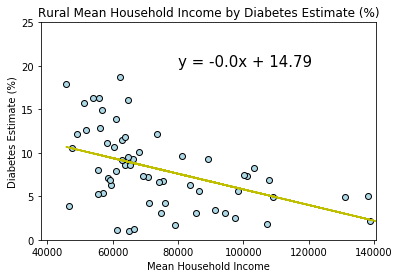

In [566]:
x_values = mean_hhinc_rural['Poverty_Mean_Household_Income']['mean']
y_values = summary_rural_df['Census_Tract_Estimate']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(80000,20),fontsize=15,color="black")
plt.ylim(0,25)
plt.xlim(38000, 140500)
plt.xlabel('Mean Household Income')
plt.ylabel('Diabetes Estimate (%)')
plt.title('Rural Mean Household Income by Diabetes Estimate (%)')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.62


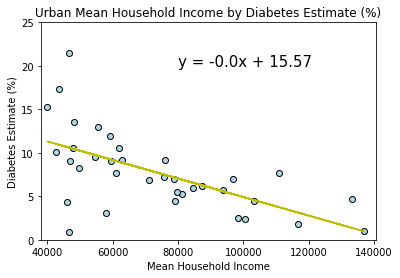

In [567]:
x_values = mean_hhinc_urban['Poverty_Mean_Household_Income']['mean']
y_values = summary_urban_df['Census_Tract_Estimate']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(80000,20),fontsize=15,color="black")
plt.ylim(0,25)
plt.xlim(38000, 140500)
plt.xlabel('Mean Household Income')
plt.ylabel('Diabetes Estimate (%)')
plt.title('Urban Mean Household Income by Diabetes Estimate (%)')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [568]:
#summary stats for rural tracts diabetes hospitalizations by county

mean=narrowed_diab_rural[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').mean()['Hospitalization_Census_Tract_Rate_per_100,000']
median=narrowed_diab_rural[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').median()['Hospitalization_Census_Tract_Rate_per_100,000']
std=narrowed_diab_rural[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').std()['Hospitalization_Census_Tract_Rate_per_100,000']
sem=narrowed_diab_rural[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').sem()['Hospitalization_Census_Tract_Rate_per_100,000']

statistics_dict_hosp={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_hosp)

mean_hosp_rural=narrowed_diab_rural.groupby('County').agg({'Hospitalization_Census_Tract_Rate_per_100,000':['mean', 'median', 'std', 'sem']})
mean_hosp_rural

Hospitalization_Census_Tract_Rate_per_100,000            \
                                                    mean    median   
County                                                               
ADAMS                                        1313.533333  1182.875   
ALAMOSA                                       723.180000   723.180   
ARAPAHOE                                     1375.233333  1278.715   
ARCHULETA                                     454.666667   530.060   
BACA                                         1067.205000  1067.205   
...                                                  ...       ...   
SUMMIT                                        164.197500   140.235   
TELLER                                        560.157500   652.650   
WASHINGTON                                   1077.025000  1077.025   
WELD                                         1180.762000  1060.370   
YUMA                                         1335.720000  1335.720   

                                    
                   std         sem  
County                              
ADAMS       432.260393  176.469567  
ALAMOSA     193.407847  136.760000  
ARAPAHOE    434.673437  177.454688  
ARCHULETA   234.291733  135.268395  
BACA        732.216143  517.755000  
...                ...         ...  
SUMMIT       81.850341   40.925170  
TELLER      230.117017  115.058508  
WASHINGTON  186.654977  131.985000  
WELD        397.354740   79.470948  
YUMA         78.149441   55.260000  

[61 rows x 4 columns]

In [569]:
#summary stats for urban tracts diabetes hospitalizations by county

mean=narrowed_diab_urban[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').mean()['Hospitalization_Census_Tract_Rate_per_100,000']
median=narrowed_diab_urban[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').median()['Hospitalization_Census_Tract_Rate_per_100,000']
std=narrowed_diab_urban[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').std()['Hospitalization_Census_Tract_Rate_per_100,000']
sem=narrowed_diab_urban[['County', 'Hospitalization_Census_Tract_Rate_per_100,000']].groupby('County').sem()['Hospitalization_Census_Tract_Rate_per_100,000']

statistics_dict_hosp={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_hosp)

mean_hosp_urban=narrowed_diab_urban.groupby('County').agg({'Hospitalization_Census_Tract_Rate_per_100,000':['mean', 'median', 'std', 'sem']})
mean_hosp_urban

Hospitalization_Census_Tract_Rate_per_100,000            \
                                                    mean    median   
County                                                               
ADAMS                                        2156.072889  1855.580   
ALAMOSA                                      1761.570000  1761.570   
ARAPAHOE                                     1614.412806  1485.810   
ARCHULETA                                     421.970000   421.970   
BOULDER                                      1005.894138   849.470   
BROOMFIELD                                   1040.322667   969.720   
CHAFFEE                                       821.665000   821.665   
DELTA                                        1282.740000  1282.740   
DENVER                                       1859.618239  1604.035   
DOUGLAS                                       943.817391   869.375   
EAGLE                                         282.100000   172.670   
EL PASO                                      1524.504018  1454.960   
FREMONT                                      1424.886250  1340.410   
GARFIELD                                      837.990000   701.600   
GUNNISON                                      773.270000   773.270   
HUERFANO                                     1688.080000  1688.080   
JEFFERSON                                    1157.553525  1096.165   
LA PLATA                                      530.197500   506.315   
LAKE                                          594.755000   594.755   
LARIMER                                      1451.187167  1293.230   
LAS ANIMAS                                   2906.720000  2832.710   
LOGAN                                        1923.175000  1923.175   
MESA                                         1432.446087  1369.090   
MOFFAT                                       1351.960000  1152.360   
MONTEZUMA                                    1137.120000  1137.120   
MONTROSE                                     1245.795000  1208.000   
MORGAN                                       2154.352500  2177.320   
OTERO                                        2505.463333  2493.310   
PITKIN                                        193.680000   193.680   
PROWERS                                      2750.495000  2750.495   
PUEBLO                                       2717.160652  2512.480   
RIO GRANDE                                   1850.840000  1850.840   
ROUTT                                         330.410000   330.410   
SUMMIT                                        103.550000   103.550   
TELLER                                        992.120000   992.120   
WELD                                         1988.373725  1733.610   

                                     
                    std         sem  
County                               
ADAMS       1659.546145  174.931523  
ALAMOSA      208.242947  147.250000  
ARAPAHOE     828.026181   70.232264  
ARCHULETA           NaN         NaN  
BOULDER      571.466805   75.037268  
BROOMFIELD   404.369729  104.407815  
CHAFFEE       24.925514   17.625000  
DELTA               NaN         NaN  
DENVER      1012.349880   84.954515  
DOUGLAS      335.647335   49.488500  
EAGLE        311.991451  155.995726  
EL PASO      721.808732   68.204514  
FREMONT      436.355744  154.275053  
GARFIELD     340.306157  152.189540  
GUNNISON            NaN         NaN  
HUERFANO            NaN         NaN  
JEFFERSON    467.284784   42.305977  
LA PLATA     113.211423   56.605711  
LAKE         267.901546  189.435000  
LARIMER      731.145451   94.390472  
LAS ANIMAS   696.868809  402.337395  
LOGAN        573.456528  405.495000  
MESA         540.607304  112.724415  
MOFFAT       504.338264  291.179832  
MONTEZUMA           NaN         NaN  
MONTROSE     382.313276  191.156638  
MORGAN       314.792158  157.396079  
OTERO       1035.933469  598.096467  
PITKIN              NaN         NaN  
PROWERS       71.212724   50.355000  
PUEBLO      1140.800796  1

The correlation between both factors is -0.26


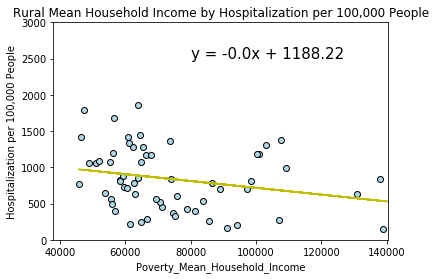

In [570]:
x_values = mean_hhinc_rural['Poverty_Mean_Household_Income']['mean']
y_values = mean_hosp_rural['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(80000,2500),fontsize=15,color="black")
plt.xlim(38000, 140500)
plt.ylim(0,3000)
plt.xlabel('Poverty_Mean_Household_Income')
plt.ylabel('Hospitalization per 100,000 People')
plt.title('Rural Mean Household Income by Hospitalization per 100,000 People')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.55


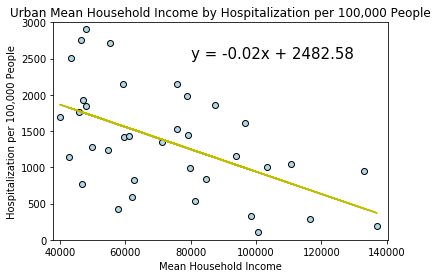

In [571]:
x_values = mean_hhinc_urban['Poverty_Mean_Household_Income']['mean']
y_values = mean_hosp_urban['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(80000,2500),fontsize=15,color="black")
plt.xlim(38000, 140500)
plt.ylim(0,3000)
plt.xlabel('Mean Household Income')
plt.ylabel('Hospitalization per 100,000 People')
plt.title('Urban Mean Household Income by Hospitalization per 100,000 People')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.56


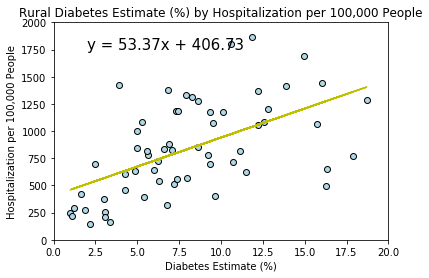

In [572]:
x_values = summary_rural_df['Census_Tract_Estimate']['mean']
y_values = mean_hosp_rural['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(2,1750),fontsize=15,color="black")
plt.xlim(0,20)
plt.ylim(0,2000)
plt.xlabel('Diabetes Estimate (%)')
plt.ylabel('Hospitalization per 100,000 People')
plt.title('Rural Diabetes Estimate (%) by Hospitalization per 100,000 People')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.76


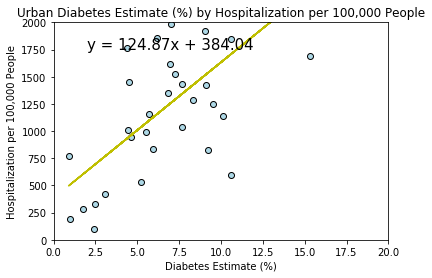

In [573]:
x_values = summary_urban_df['Census_Tract_Estimate']['mean']
y_values = mean_hosp_urban['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(2,1750),fontsize=15,color="black")
plt.xlim(0,20)
plt.ylim(0,2000)
plt.xlabel('Diabetes Estimate (%)')
plt.ylabel('Hospitalization per 100,000 People')
plt.title('Urban Diabetes Estimate (%) by Hospitalization per 100,000 People')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [574]:
#summary stats for urban tracts diabetes hospitalizations by county

mean=narrowed_diab_rural[['County', 'LILATracts_Vehicle']].groupby('County').mean()['LILATracts_Vehicle']
median=narrowed_diab_rural[['County', 'LILATracts_Vehicle']].groupby('County').median()['LILATracts_Vehicle']
std=narrowed_diab_rural[['County', 'LILATracts_Vehicle']].groupby('County').std()['LILATracts_Vehicle']
sem=narrowed_diab_rural[['County', 'LILATracts_Vehicle']].groupby('County').sem()['LILATracts_Vehicle']

statistics_dict_hosp={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_hosp)

lila120_rural=narrowed_diab_rural.groupby('County').agg({'LILATracts_Vehicle':['mean', 'median', 'std', 'sem']})
lila120_rural

LILATracts_Vehicle                      
                         mean median       std  sem
County                                             
ADAMS                     0.0    0.0  0.000000  0.0
ALAMOSA                   0.0    0.0  0.000000  0.0
ARAPAHOE                  0.0    0.0  0.000000  0.0
ARCHULETA                 0.0    0.0  0.000000  0.0
BACA                      0.0    0.0  0.000000  0.0
...                       ...    ...       ...  ...
SUMMIT                    0.0    0.0  0.000000  0.0
TELLER                    0.0    0.0  0.000000  0.0
WASHINGTON                0.5    0.5  0.707107  0.5
WELD                      0.0    0.0  0.000000  0.0
YUMA                      0.0    0.0  0.000000  0.0

[61 rows x 4 columns]

In [575]:
#summary stats for urban LILATracts_1And20 Vehicle by county

mean=narrowed_diab_urban[['County', 'LILATracts_Vehicle']].groupby('County').mean()['LILATracts_Vehicle']
median=narrowed_diab_urban[['County', 'LILATracts_Vehicle']].groupby('County').median()['LILATracts_Vehicle']
std=narrowed_diab_urban[['County', 'LILATracts_Vehicle']].groupby('County').std()['LILATracts_Vehicle']
sem=narrowed_diab_urban[['County', 'LILATracts_Vehicle']].groupby('County').sem()['LILATracts_Vehicle']

statistics_dict_hosp={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_hosp)

lila120_urban=narrowed_diab_urban.groupby('County').agg({'LILATracts_Vehicle':['mean', 'median', 'std', 'sem']})
lila120_urban

LILATracts_Vehicle                           
                         mean median       std       sem
County                                                  
ADAMS                0.111111    0.0  0.316030  0.033313
ALAMOSA              0.000000    0.0  0.000000  0.000000
ARAPAHOE             0.122302    0.0  0.328819  0.027890
ARCHULETA            0.000000    0.0       NaN       NaN
BOULDER              0.051724    0.0  0.223404  0.029334
BROOMFIELD           0.000000    0.0  0.000000  0.000000
CHAFFEE              0.000000    0.0  0.000000  0.000000
DELTA                0.000000    0.0       NaN       NaN
DENVER               0.302817    0.0  0.461103  0.038695
DOUGLAS              0.000000    0.0  0.000000  0.000000
EAGLE                0.000000    0.0  0.000000  0.000000
EL PASO              0.214286    0.0  0.412170  0.038946
FREMONT              0.250000    0.0  0.462910  0.163663
GARFIELD             0.000000    0.0  0.000000  0.000000
GUNNISON             0.000000    0.0       NaN       NaN
HUERFANO             1.000000    1.0       NaN       NaN
JEFFERSON            0.106557    0.0  0.309822  0.028050
LA PLATA             0.000000    0.0  0.000000  0.000000
LAKE                 0.000000    0.0  0.000000  0.000000
LARIMER              0.116667    0.0  0.323732  0.041794
LAS ANIMAS           0.333333    0.0  0.577350  0.333333
LOGAN                0.000000    0.0  0.000000  0.000000
MESA                 0.173913    0.0  0.387553  0.080810
MOFFAT               0.000000    0.0  0.000000  0.000000
MONTEZUMA            1.000000    1.0       NaN       NaN
MONTROSE             0.250000    0.0  0.500000  0.250000
MORGAN               0.250000    0.0  0.500000  0.250000
OTERO                0.666667    1.0  0.577350  0.333333
PITKIN               0.000000    0.0       NaN       NaN
PROWERS              0.500000    0.5  0.707107  0.500000
PUEBLO               0.239130    0.0  0.431266  0.063587
RIO GRANDE           0.000000    0.0       NaN       NaN
ROUTT                0.000000    0.0  0.000000  0.000000
SUMMIT               0.000000    0.0       NaN       NaN
TELLER               0.000000    0.0  0.000000  0.000000
WELD                 0.039216    0.0  0.196039  0.027451

The correlation between both factors is 0.45


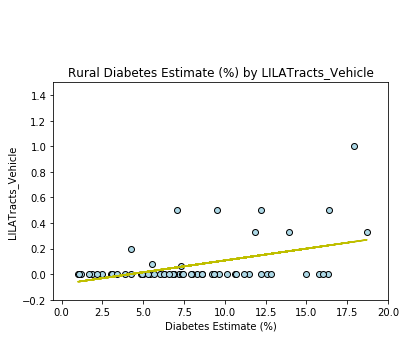

In [576]:
x_values = summary_rural_df['Census_Tract_Estimate']['mean']
y_values = lila120_rural['LILATracts_Vehicle']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(1,2),fontsize=15,color="black")
plt.xlim(-.5,20)
plt.ylim(-.2,1.5)
plt.xlabel('Diabetes Estimate (%)')
plt.ylabel('LILATracts_Vehicle')
plt.title('Rural Diabetes Estimate (%) by LILATracts_Vehicle')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.65


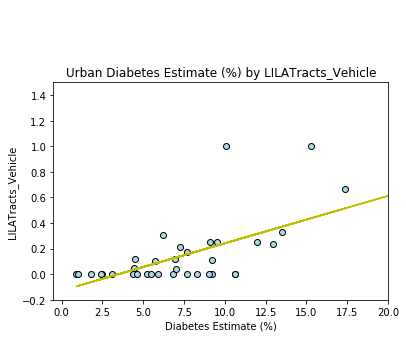

In [577]:
x_values = summary_urban_df['Census_Tract_Estimate']['mean']
y_values = lila120_urban['LILATracts_Vehicle']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(1,2),fontsize=15,color="black")
plt.xlim(-.5,20)
plt.ylim(-.2,1.5)
plt.xlabel('Diabetes Estimate (%)')
plt.ylabel('LILATracts_Vehicle')
plt.title('Urban Diabetes Estimate (%) by LILATracts_Vehicle')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.15


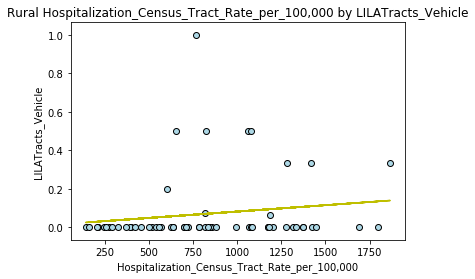

In [578]:
x_values = mean_hosp_rural['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
y_values = lila120_rural['LILATracts_Vehicle']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
# plt.annotate(line_eq,(1,2),fontsize=15,color="black")
# plt.xlim(-.5,20)
# plt.ylim(-.2,1.5)
plt.xlabel('Hospitalization_Census_Tract_Rate_per_100,000')
plt.ylabel('LILATracts_Vehicle')
plt.title('Rural Hospitalization_Census_Tract_Rate_per_100,000 by LILATracts_Vehicle')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.44


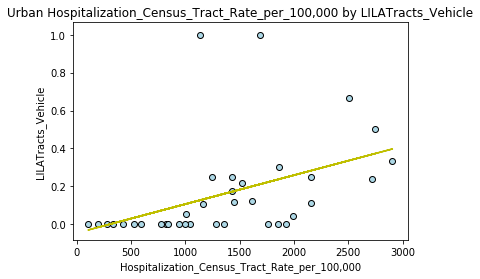

In [579]:
x_values = mean_hosp_urban['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
y_values = lila120_urban['LILATracts_Vehicle']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
# plt.annotate(line_eq,(1,2),fontsize=15,color="black")
# plt.xlim(-.5,20)
# plt.ylim(-.2,1.5)
plt.xlabel('Hospitalization_Census_Tract_Rate_per_100,000')
plt.ylabel('LILATracts_Vehicle')
plt.title('Urban Hospitalization_Census_Tract_Rate_per_100,000 by LILATracts_Vehicle')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [581]:
#summary stats for rural tracts education by county

mean=narrowed_diab_rural[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').mean()['Percent_Education_Population_AgeOver24_HSD_Higher']
median=narrowed_diab_rural[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').median()['Percent_Education_Population_AgeOver24_HSD_Higher']
std=narrowed_diab_rural[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').std()['Percent_Education_Population_AgeOver24_HSD_Higher']
sem=narrowed_diab_rural[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').sem()['Percent_Education_Population_AgeOver24_HSD_Higher']

statistics_dict_hosp={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_hosp)

edu_rural=narrowed_diab_rural.groupby('County').agg({'Percent_Education_Population_AgeOver24_HSD_Higher':['mean', 'median', 'std', 'sem']})
edu_rural

Percent_Education_Population_AgeOver24_HSD_Higher                   \
                                                        mean median       std   
County                                                                          
ADAMS                                              91.366667  92.85  5.623048   
ALAMOSA                                            86.050000  86.05  4.171930   
ARAPAHOE                                           93.000000  92.95  2.719559   
ARCHULETA                                          92.200000  92.80  3.835362   
BACA                                               85.350000  85.35  1.626346   
...                                                      ...    ...       ...   
SUMMIT                                             93.525000  92.50  3.792427   
TELLER                                             95.175000  95.45  2.511805   
WASHINGTON                                         93.100000  93.10  0.565685   
WELD                                               90.428000  93.90  7.442419   
YUMA                                               85.650000  85.65  2.333452   

                      
                 sem  
County                
ADAMS       2.295600  
ALAMOSA     2.950000  
ARAPAHOE    1.110255  
ARCHULETA   2.214347  
BACA        1.150000  
...              ...  
SUMMIT      1.896213  
TELLER      1.255903  
WASHINGTON  0.400000  
WELD        1.488484  
YUMA        1.650000  

[61 rows x 4 columns]

In [586]:
#summary stats for urban tracts education by county

mean=narrowed_diab_urban[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').mean()['Percent_Education_Population_AgeOver24_HSD_Higher']
median=narrowed_diab_urban[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').median()['Percent_Education_Population_AgeOver24_HSD_Higher']
std=narrowed_diab_urban[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').std()['Percent_Education_Population_AgeOver24_HSD_Higher']
sem=narrowed_diab_urban[['County', 'Percent_Education_Population_AgeOver24_HSD_Higher']].groupby('County').sem()['Percent_Education_Population_AgeOver24_HSD_Higher']

statistics_dict_hosp={
        'Mean': mean,
        'Median': median,
        'Standard_deviation': std,
        'Standard_Error_Mean': sem
}

summary_statistics=pd.DataFrame(statistics_dict_hosp)

edu_urban=narrowed_diab_urban.groupby('County').agg({'Percent_Education_Population_AgeOver24_HSD_Higher':['mean', 'median', 'std', 'sem']})
edu_urban

Percent_Education_Population_AgeOver24_HSD_Higher         \
                                                        mean median   
County                                                                
ADAMS                                              80.968889  81.75   
ALAMOSA                                            80.950000  80.95   
ARAPAHOE                                           92.114388  94.70   
ARCHULETA                                          89.600000  89.60   
BOULDER                                            94.525862  97.05   
BROOMFIELD                                         95.840000  96.70   
CHAFFEE                                            85.900000  85.90   
DELTA                                              84.400000  84.40   
DENVER                                             86.230986  91.60   
DOUGLAS                                            97.904348  98.20   
EAGLE                                              88.525000  89.55   
EL PASO                                            92.916964  94.95   
FREMONT                                            93.125000  92.75   
GARFIELD                                           89.080000  90.10   
GUNNISON                                           91.400000  91.40   
HUERFANO                                           86.200000  86.20   
JEFFERSON                                          93.940164  95.45   
LA PLATA                                           97.625000  98.05   
LAKE                                               84.450000  84.45   
LARIMER                                            95.433333  96.15   
LAS ANIMAS                                         85.866667  86.00   
LOGAN                                              85.750000  85.75   
MESA                                               89.643478  90.20   
MOFFAT                                             90.866667  91.90   
MONTEZUMA                                          89.900000  89.90   
MONTROSE                                           88.700000  88.40   
MORGAN                                             77.275000  77.40   
OTERO                                              82.100000  82.50   
PITKIN                                             98.100000  98.10   
PROWERS                                            75.900000  75.90   
PUEBLO                                             87.919565  88.95   
RIO GRANDE                                         81.500000  81.50   
ROUTT                                              96.150000  96.15   
SUMMIT                                             96.600000  96.60   
TELLER                                             95.650000  95.65   
WELD                                               86.527451  89.80   

                                  
                  std        sem  
County                            
ADAMS       11.817285   1.245651  
ALAMOSA     10.394470   7.350000  
ARAPAHOE     7.633968   0.647505  
ARCHULETA         NaN        NaN  
BOULDER      5.762996   0.756718  
BROOMFIELD   2.741689   0.707901  
CHAFFEE      8.202439   5.800000  
DELTA             NaN        NaN  
DENVER      13.240370   1.111107  
DOUGLAS      1.383065   0.203922  
EAGLE       10.113152   5.056576  
EL PASO      5.464659   0.516362  
FREMONT      2.182888   0.771767  
GARFIELD     2.494394   1.115527  
GUNNISON          NaN        NaN  
HUERFANO          NaN        NaN  
JEFFERSON    5.322658   0.481891  
LA PLATA     1.787689   0.893845  
LAKE         7.141778   5.050000  
LARIMER      3.929103   0.507245  
LAS ANIMAS   1.604161   0.926163  
LOGAN        3.747666   2.650000  
MESA         4.033477   0.841038  
MOFFAT       5.128678   2.961043  
MONTEZUMA         NaN        NaN  
MONTROSE     4.992661   2.496331  
MORGAN       5.599628   2.799814  
OTERO        7.907591   4.565450  
PITKIN            NaN        NaN  
PROWERS     21.071782  14.900000  
PUEBLO       7.660363   1.129459  
RIO GRANDE        NaN        NaN  
ROUTT        1.4

The correlation between both factors is -0.69


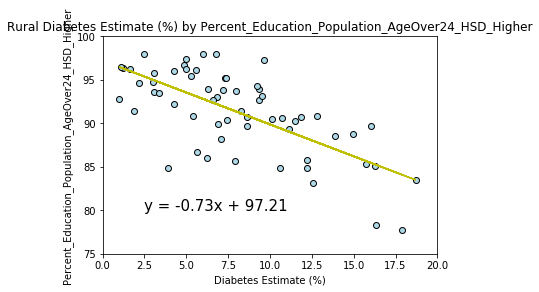

In [589]:
x_values = summary_rural_df['Census_Tract_Estimate']['mean']
y_values = edu_rural['Percent_Education_Population_AgeOver24_HSD_Higher']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(2.5,80),fontsize=15,color="black")
plt.xlim(0,20)
plt.ylim(75,100)
plt.xlabel('Diabetes Estimate (%)')
plt.ylabel('Percent_Education_Population_AgeOver24_HSD_Higher')
plt.title('Rural Diabetes Estimate (%) by Percent_Education_Population_AgeOver24_HSD_Higher')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.68


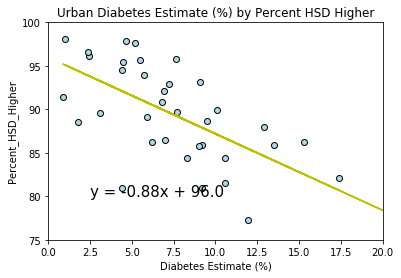

In [590]:
x_values = summary_urban_df['Census_Tract_Estimate']['mean']
y_values = edu_urban['Percent_Education_Population_AgeOver24_HSD_Higher']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(2.5,80),fontsize=15,color="black")
plt.xlim(0,20)
plt.ylim(75,100)
plt.xlabel('Diabetes Estimate (%)')
plt.ylabel('Percent_HSD_Higher')
plt.title('Urban Diabetes Estimate (%) by Percent HSD Higher')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.42


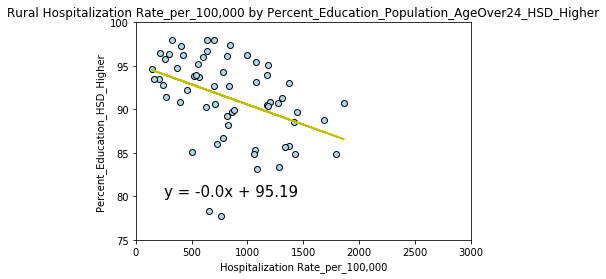

In [597]:
x_values = mean_hosp_rural['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
y_values = edu_rural['Percent_Education_Population_AgeOver24_HSD_Higher']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(250,80),fontsize=15,color="black")
plt.xlim(0,3000)
plt.ylim(75,100)
plt.xlabel('Hospitalization Rate_per_100,000')
plt.ylabel('Percent_Education_HSD_Higher')
plt.title('Rural Hospitalization Rate_per_100,000 by Percent_Education_Population_AgeOver24_HSD_Higher')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is -0.66


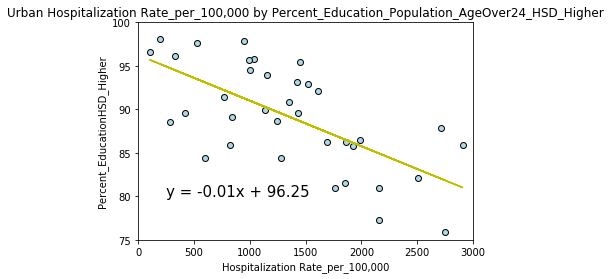

In [596]:
x_values = mean_hosp_urban['Hospitalization_Census_Tract_Rate_per_100,000']['mean']
y_values = edu_urban['Percent_Education_Population_AgeOver24_HSD_Higher']['mean']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,marker='o',facecolors='lightblue',edgecolors='black')
plt.plot(x_values,regress_values,"y-")
plt.annotate(line_eq,(250,80),fontsize=15,color="black")
plt.xlim(0,3000)
plt.ylim(75,100)
plt.xlabel('Hospitalization Rate_per_100,000')
plt.ylabel('Percent_EducationHSD_Higher')
plt.title('Urban Hospitalization Rate_per_100,000 by Percent_Education_Population_AgeOver24_HSD_Higher')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [580]:
narrowed_diab_rural = narrowed_diab_df[narrowed_diab_df["Rural"]== 1]
ct_rural_count = narrowed_diab_rural["County"].count()
print(f"There are {ct_rural_count} Colorado census tracts designated as rural.")
ct_rural_sum = narrowed_diab_rural["Pop_Total"].sum()
print(f"There are {ct_rural_sum} people living in rural census tracts in Colorado.")
ct_rural_per_cap = narrowed_diab_rural["Per_Capita_Income"].mean()
print(f"The average per capita income is {ct_rural_per_cap} for these census tracts.")
avg_diab_rural = narrowed_diab_rural["Census_Tract_Estimate"].mean()
print(f"The average diabetes rate for rural census tracts is: {avg_diab_rural}.")
avg_hosp_rural = narrowed_diab_rural["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
print(f"The average diabetes hospitalization rate per 100,000 for rural census tracts is: {avg_hosp_rural}.")
avg_per_rural = narrowed_diab_rural["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in rural census tracts is: {avg_per_rural}.")
avg_median_rural = narrowed_diab_rural["Median_Household_Income"].mean()
print(f"The average median income in rural census tracts is: {avg_median_rural}.")
avg_edu9_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
print(f"The avg percent of folks with less than a 9th grade education in rural census tracts: {avg_edu9_rural}.")
avg_eduhs_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()
print(f"The avg percent of folks with less than a HS education in rural census tracts: {avg_eduhs_rural}.")
avg_eduhsdhigh_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_HSD_Higher"].mean()
print(f"The avg percent of folks with greater than a HS education in rural census tracts: {avg_eduhsdhigh_rural}.")
avg_edubshigh_rural = narrowed_diab_rural["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in rural census tracts: {avg_edubshigh_rural}.")



There are 264 Colorado census tracts designated as rural.
There are 1036160 people living in rural census tracts in Colorado.
The average per capita income is 35750.73484848485 for these census tracts.
The average diabetes rate for rural census tracts is: 7.35568181818182.
The average diabetes hospitalization rate per 100,000 for rural census tracts is: 868.8167045454544.
The estimated average diabetes diagnosis rate for adults in rural census tracts is: 7.35568181818182.
The average median income in rural census tracts is: 71591.31439393939.
The avg percent of folks with less than a 9th grade education in rural census tracts: 2.8837121212121186.
The avg percent of folks with less than a HS education in rural census tracts: 7.467424242424242.
The avg percent of folks with greater than a HS education in rural census tracts: 92.53446969696974.
The avg percent of folks with a BS or greater education in rural census tracts: 35.5352272727273.


In [273]:
narrowed_diab_urban = narrowed_diab_df[merged_diabetes_df["Urban"]== 1]
ct_urban_count = narrowed_diab_urban["County"].count()
ct_urban_sum = narrowed_diab_urban["Pop_Total"].sum()
ct_urban_per_cap = narrowed_diab_urban ["Per_Capita_Income"].mean()
avg_diab_urban = narrowed_diab_urban["Census_Tract_Estimate"].mean()
avg_hosp_urban = narrowed_diab_urban["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
avg_per_urban = narrowed_diab_urban["Census_Tract_Estimate"].mean()
avg_median_urban = narrowed_diab_urban["Median_Household_Income"].mean()
avg_edu9_urban = narrowed_diab_urban["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
avg_eduhs_urban = narrowed_diab_urban["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()

print(f"There are {ct_urban_count} Colorado census tracts designated as urban.")

print(f"There are {ct_urban_sum} people living in urban census tracts in Colorado.")

print(f"The average per capita income is {ct_urban_per_cap} for these census tracts.")

print(f"The average diabetes rate for urban census tracts is: {avg_diab_urban}.")

print(f"The average diabetes hospitalization rate per 100,000 for urban census tracts is: {avg_hosp_urban}.")

print(f"The estimated average diabetes diagnosis rate for adults in urban census tracts is: {avg_per_urban}.")

print(f"The average median income in rural census tracts is: {avg_median_urban}.")

print(f"The avg percent of folks with less than a 9th grade education in urban census tracts: {avg_edu9_urban}.")

print(f"The avg percent of folks with less than a HS education in urban census tracts: {avg_eduhs_urban}.")

print(f"The avg percent of folks with greater than a HS education in urban census tracts: {avg_eduhsdhigh_urban}.")
avg_edubshigh_urban = narrowed_diab_urban["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in urban census tracts: {avg_edubshigh_urban}.")

There are 964 Colorado census tracts designated as urban.
There are 4359645 people living in urban census tracts in Colorado.
The average per capita income is 34716.10580912863 for these census tracts.
The average diabetes rate for urban census tracts is: 6.926348547717847.
The average diabetes hospitalization rate per 100,000 for urban census tracts is: 1594.1792842323657.
The estimated average diabetes diagnosis rate for adults in urban census tracts is: 6.926348547717847.
The average median income in rural census tracts is: 69115.81846473028.
The avg percent of folks with less than a 9th grade education in urban census tracts: 4.0075726141078825.
The avg percent of folks with less than a HS education in urban census tracts: 9.569294605809125.
The avg percent of folks with greater than a HS education in urban census tracts: 90.43008298755188.
The avg percent of folks with a BS or greater education in urban census tracts: 39.33246887966806.


In [274]:
narrowed_diab_lowinc = narrowed_diab_df[narrowed_diab_df["Low_Income_Tract"]== 1]
ct_lowinc_count = narrowed_diab_lowinc["County"].count()
print(f"There are {ct_lowinc_count} Colorado census tracts designated as lowinc.")
ct_lowinc_sum = narrowed_diab_lowinc["Pop_Total"].sum()
print(f"There are {ct_lowinc_sum} people living in lowinc census tracts in Colorado.")
ct_lowinc_per_cap = narrowed_diab_lowinc["Per_Capita_Income"].mean()
print(f"The average per capita income is {ct_lowinc_per_cap} for these census tracts.")
avg_diab_lowinc = narrowed_diab_lowinc["Census_Tract_Estimate"].mean()
print(f"The average diabetes rate for lowinc census tracts is: {avg_diab_lowinc}.")
avg_hosp_lowinc = narrowed_diab_lowinc["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
print(f"The average diabetes hospitalization rate per 100,000 for lowinc census tracts is: {avg_hosp_rural}.")
avg_per_lowinc = narrowed_diab_lowinc["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in lowinc census tracts is: {avg_per_rural}.")
avg_median_lowinc = narrowed_diab_lowinc["Median_Household_Income"].mean()
print(f"The average median income in lowinc census tracts is: {avg_median_lowinc}.")
avg_edu9_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
print(f"The avg percent of folks with less than a 9th grade education in lowinc census tracts: {avg_edu9_lowinc}.")
avg_eduhs_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()
print(f"The avg percent of folks with less than a HS education in lowinc census tracts: {avg_eduhs_lowinc}.")
avg_eduhsdhigh_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_HSD_Higher"].mean()
print(f"The avg percent of folks with greater than a HS education in lowinc census tracts: {avg_eduhsdhigh_lowinc}.")
avg_edubshigh_lowinc = narrowed_diab_lowinc["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in lowinc census tracts: {avg_edubshigh_lowinc}.")

There are 475 Colorado census tracts designated as lowinc.
There are 1956204 people living in lowinc census tracts in Colorado.
The average per capita income is 25106.11157894737 for these census tracts.
The average diabetes rate for lowinc census tracts is: 7.868421052631578.
The average diabetes hospitalization rate per 100,000 for lowinc census tracts is: 868.8167045454544.
The estimated average diabetes diagnosis rate for adults in lowinc census tracts is: 7.35568181818182.
The average median income in lowinc census tracts is: 46630.20210526316.
The avg percent of folks with less than a 9th grade education in lowinc census tracts: 6.848842105263151.
The avg percent of folks with less than a HS education in lowinc census tracts: 15.462315789473687.
The avg percent of folks with greater than a HS education in lowinc census tracts: 84.53642105263151.
The avg percent of folks with a BS or greater education in lowinc census tracts: 26.580210526315767.


In [275]:
narrowed_diab_highinc = narrowed_diab_df[narrowed_diab_df["Low_Income_Tract"]== 0]
ct_highinc_count = narrowed_diab_highinc["County"].count()
print(f"There are {ct_highinc_count} Colorado census tracts designated as highinc.")
ct_highinc_sum = narrowed_diab_highinc["Pop_Total"].sum()
print(f"There are {ct_highinc_sum} people living in highinc census tracts in Colorado.")
ct_highinc_per_cap = narrowed_diab_highinc["Per_Capita_Income"].mean()
print(f"The average per capita income is {ct_highinc_per_cap} for these census tracts.")
avg_diab_highinc = narrowed_diab_highinc["Census_Tract_Estimate"].mean()
print(f"The average diabetes rate for highinc census tracts is: {avg_diab_highinc}.")
avg_hosp_highinc = narrowed_diab_highinc["Hospitalization_Census_Tract_Rate_per_100,000"].mean()
print(f"The average diabetes hospitalization rate per 100,000 for highinc census tracts is: {avg_hosp_highinc}.")
avg_per_highinc = narrowed_diab_highinc["Census_Tract_Estimate"].mean()
print(f"The estimated average diabetes diagnosis rate for adults in highinc census tracts is: {avg_per_highinc}.")
avg_median_highinc = narrowed_diab_highinc["Median_Household_Income"].mean()
print(f"The average median income in highinc census tracts is: {avg_median_highinc}.")
avg_edu9_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_LessThan9th"].mean()
print(f"The avg percent of folks with less than a 9th grade education in highinc census tracts: {avg_edu9_highinc}.")
avg_eduhs_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_NoHSDiploma"].mean()
print(f"The avg percent of folks with less than a HS education in highinc census tracts: {avg_eduhs_highinc}.")
avg_eduhsdhigh_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_HSD_Higher"].mean()
print(f"The avg percent of folks with greater than a HS education in highinc census tracts: {avg_eduhsdhigh_highinc}.")
avg_edubshigh_highinc = narrowed_diab_highinc["Percent_Education_Population_AgeOver24_Bachelors_Higher"].mean()
print(f"The avg percent of folks with a BS or greater education in highinc census tracts: {avg_edubshigh_highinc}.")

There are 753 Colorado census tracts designated as highinc.
There are 3439601 people living in highinc census tracts in Colorado.
The average per capita income is 41140.925630810096 for these census tracts.
The average diabetes rate for highinc census tracts is: 6.482602921646746.
The average diabetes hospitalization rate per 100,000 for highinc census tracts is: 1052.706932270917.
The estimated average diabetes diagnosis rate for adults in highinc census tracts is: 6.482602921646746.
The average median income in highinc census tracts is: 84167.87516600266.
The avg percent of folks with less than a 9th grade education in highinc census tracts: 1.8212483399734383.
The avg percent of folks with less than a HS education in highinc census tracts: 5.1150066401062455.
The avg percent of folks with greater than a HS education in highinc census tracts: 94.88565737051785.
The avg percent of folks with a BS or greater education in highinc census tracts: 46.04541832669319.


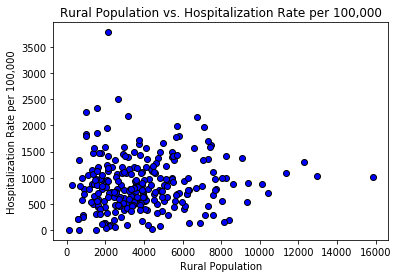

In [276]:
rural_pop = narrowed_diab_rural["Pop_Total"]
hosp_rate = narrowed_diab_rural["Hospitalization_Census_Tract_Rate_per_100,000"]
plt.scatter(rural_pop,hosp_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Rural Population vs. Hospitalization Rate per 100,000")
plt.xlabel("Rural Population")
plt.ylabel("Hospitalization Rate per 100,000")
plt.show()

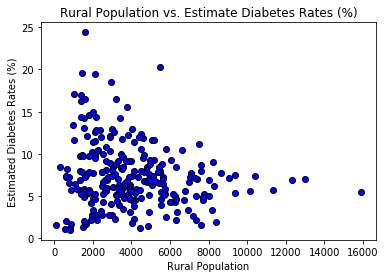

In [277]:
rural_pop = narrowed_diab_rural["Pop_Total"]
diab_rate = narrowed_diab_rural["Census_Tract_Estimate"]
plt.scatter(rural_pop,diab_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Rural Population vs. Estimate Diabetes Rates (%)")
plt.xlabel("Rural Population")
plt.ylabel("Estimated Diabetes Rates (%)")
plt.show()

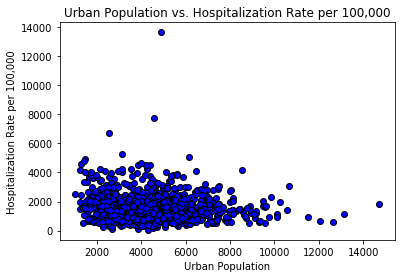

In [278]:
urban_pop = narrowed_diab_urban["Pop_Total"]
hosp_rate = narrowed_diab_urban["Hospitalization_Census_Tract_Rate_per_100,000"]
plt.scatter(urban_pop,hosp_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Urban Population vs. Hospitalization Rate per 100,000")
plt.xlabel("Urban Population")
plt.ylabel("Hospitalization Rate per 100,000")
plt.show()

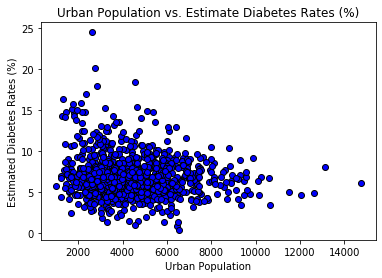

In [279]:
urban_pop = narrowed_diab_urban["Pop_Total"]
diab_rate = narrowed_diab_urban["Census_Tract_Estimate"]
plt.scatter(urban_pop,diab_rate, marker="o", facecolors="blue", edgecolors="black")
plt.title("Urban Population vs. Estimate Diabetes Rates (%)")
plt.xlabel("Urban Population")
plt.ylabel("Estimated Diabetes Rates (%)")
plt.show()

The correlation between both factors is 0.18


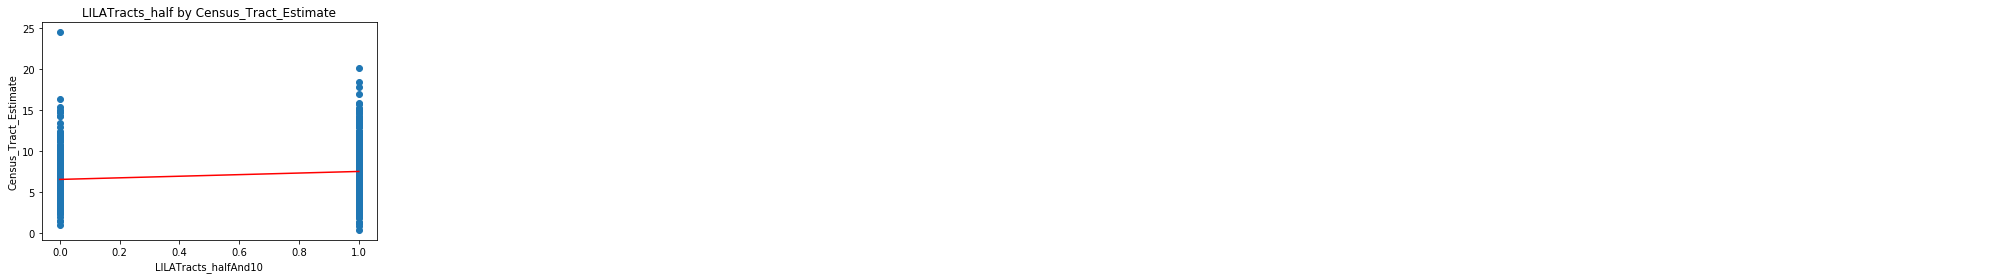

In [280]:
x_values = narrowed_diab_urban['LILATracts_halfAnd10']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_halfAnd10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_half by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.38


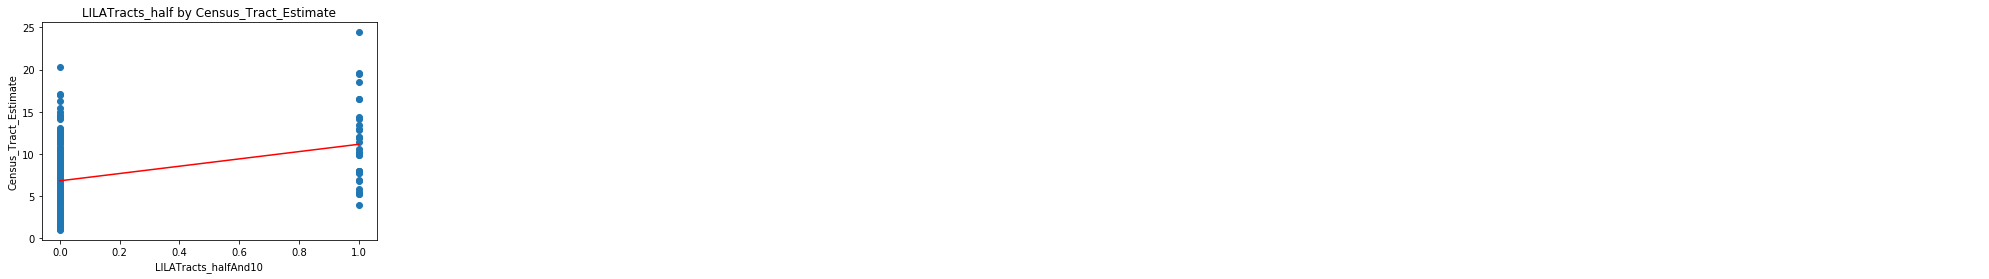

In [281]:
x_values = narrowed_diab_rural['LILATracts_halfAnd10']
y_values = narrowed_diab_rural['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_halfAnd10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_half by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.18


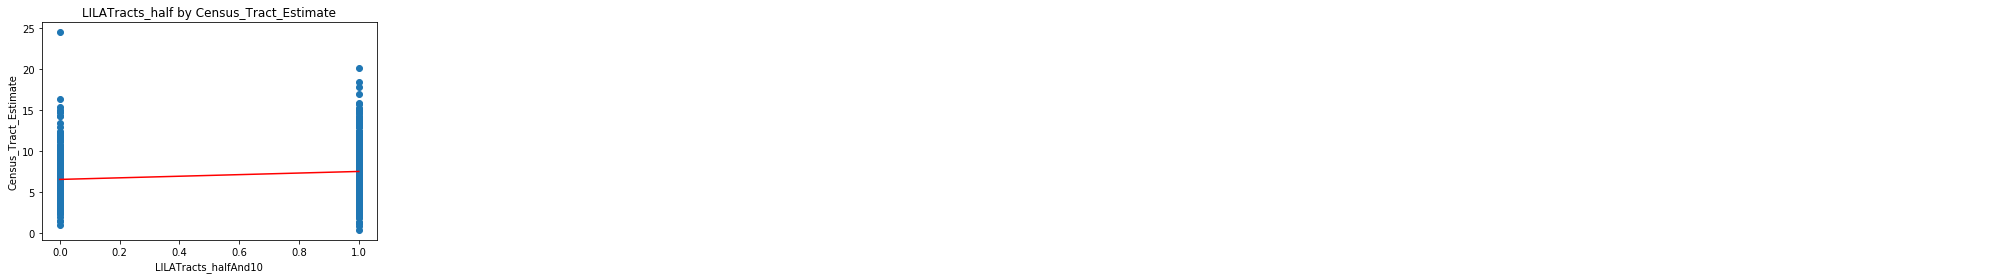

In [282]:
x_values = narrowed_diab_urban['LILATracts_halfAnd10']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_halfAnd10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_half by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.27


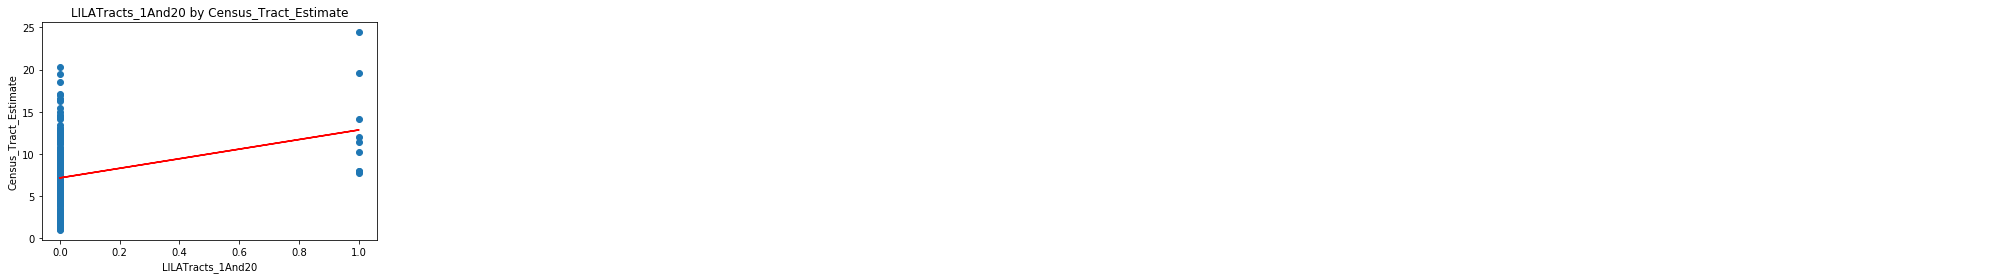

In [283]:
x_values = narrowed_diab_rural['LILATracts_1And20']
y_values = narrowed_diab_rural['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And20')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And20 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.17


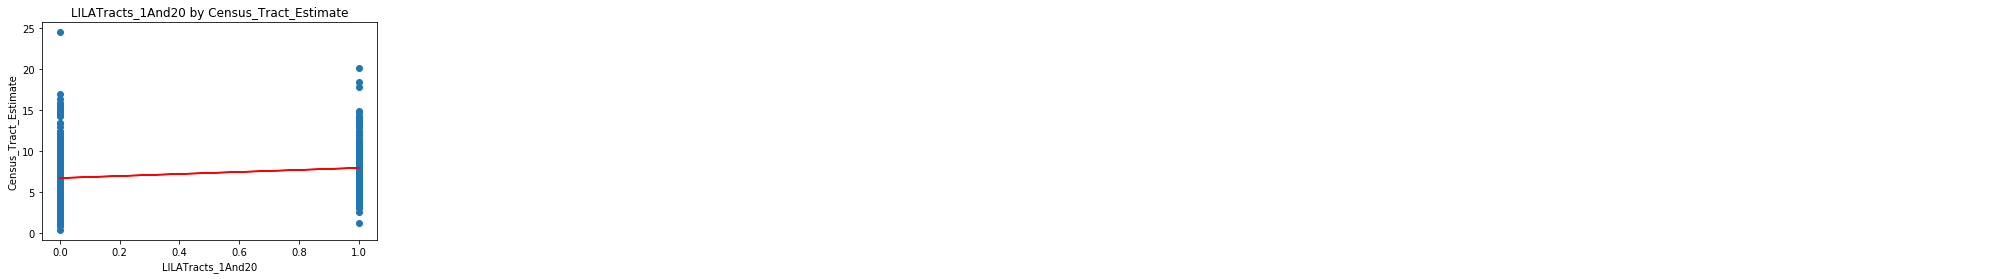

In [284]:
x_values = narrowed_diab_urban['LILATracts_1And20']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And20')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And20 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.38


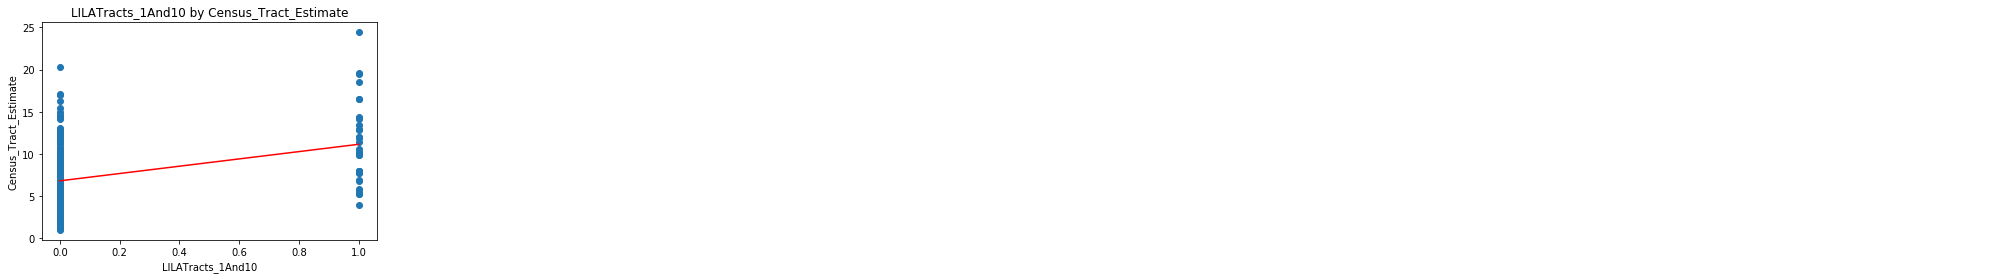

In [285]:
x_values = narrowed_diab_rural['LILATracts_1And10']
y_values = narrowed_diab_rural['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And10 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()


The correlation between both factors is 0.17


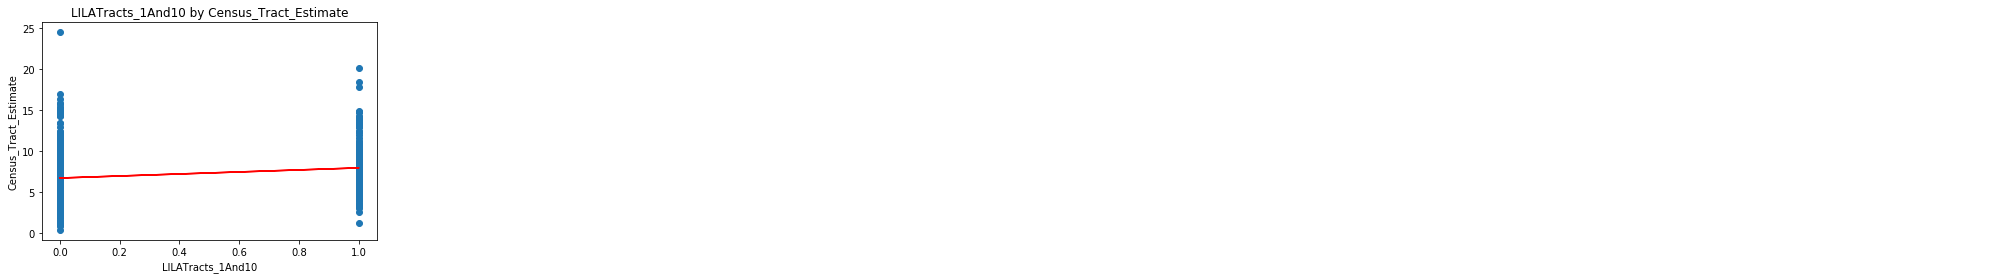

In [286]:
x_values = narrowed_diab_urban['LILATracts_1And10']
y_values = narrowed_diab_urban['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Census_Tract_Estimate')
plt.title('LILATracts_1And10 by Census_Tract_Estimate')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.38


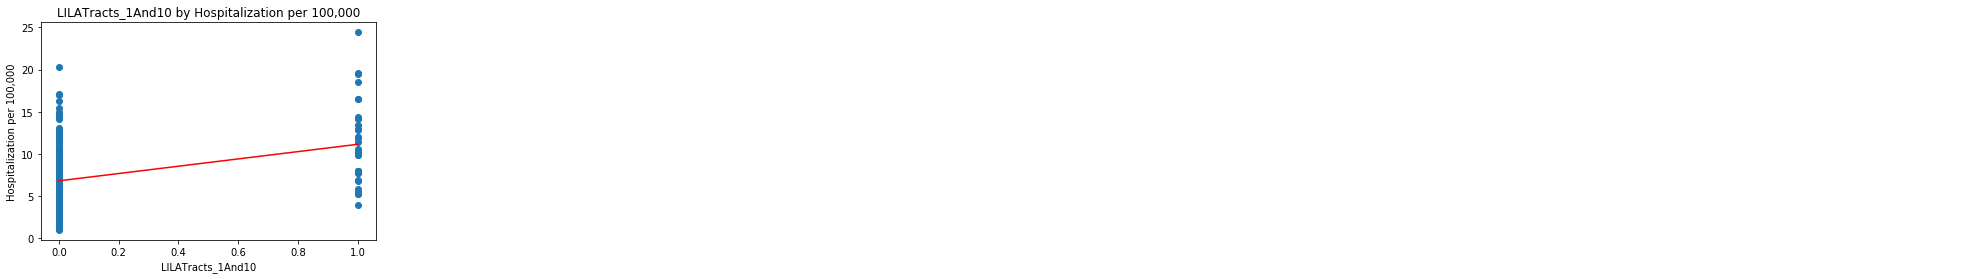

In [287]:
x_values = narrowed_diab_rural['LILATracts_1And10']
y_values = narrowed_diab_rural['Census_Tract_Estimate']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Hospitalization per 100,000')
plt.title('LILATracts_1And10 by Hospitalization per 100,000')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

The correlation between both factors is 0.26


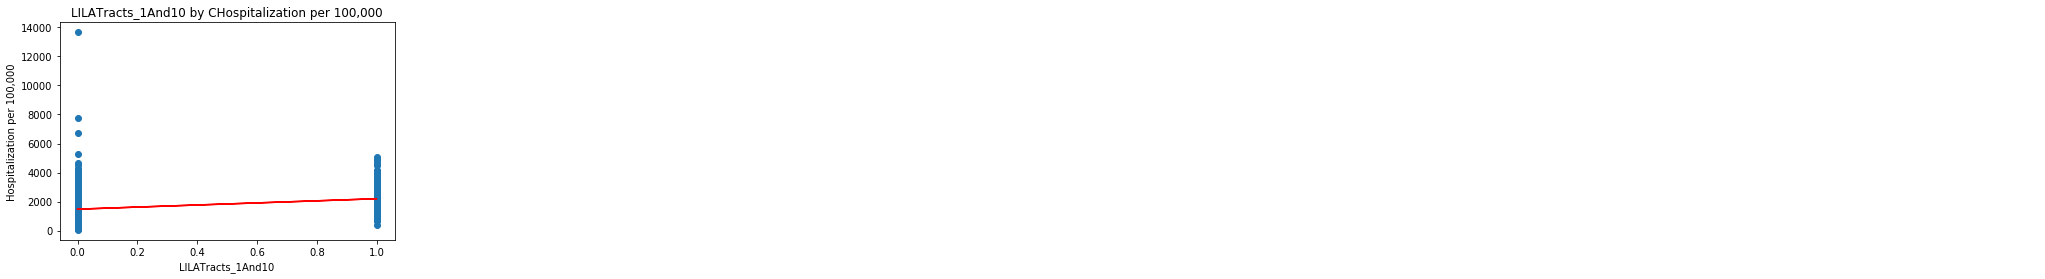

In [288]:
x_values = narrowed_diab_urban['LILATracts_1And10']
y_values = narrowed_diab_urban['Hospitalization_Census_Tract_Rate_per_100,000']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('LILATracts_1And10')
plt.ylabel('Hospitalization per 100,000')
plt.title('LILATracts_1And10 by CHospitalization per 100,000')
correlation = st.pearsonr(x_values, y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [289]:
#format dictionary to clean up and present values appropriately
format_dict = {"Hospitalization_Census_Tract_Rate_per_100,000": "{:,.2f}", "Hospitlization_State_Rate_per_100,000": "{:,.2f}",
               "Adult_Pop_Over_18": "{:,}", "Census_Tract_Estimate": "{:,.1f}%", "Pop_Total": "{:,}", 
               "Pop_Density/Sq_Mile": "{:,.1f}", "Percent_Poverty": "{:,.1f}%", "Median_Household_Income": "${:20,.2f}",
               "Poverty_Mean_Household_Income": "${:20,.2f}", "Per_Capita_Income": "${:20,.2f}", "LILATracts_1And10": "{:,}",
               "LILATracts_halfAnd10": "{:,}", "LILATracts_1And20":"{:,}","LILATracts_Vehicle":"{:,}", 
               "Urban":"{:,}", "Rural": "{:,}", "Low_Income_Tract":"{:,}", 
               "Percent_Education_Population_AgeOver24_LessThan9th": "{:,.1f}%", 
               "Percent_Education_Population_AgeOver24_NoHSDiploma": "{:,.1f}%",
               "Percent_Education_Population_AgeOver24_HSD_Higher": "{:,.1f}%",
               "Percent_Education_Population_AgeOver24_Bachelors_Higher":"{:,.1f}%"}
 
#final cleanup, passed in the style dictionary
narrowed_diab_df_formatted = narrowed_diab_df.style.format(format_dict)
narrowed_diab_df_formatted

In [599]:
FIPS_list = []
FIPS_list = narrowed_diab_df['FIPS'].to_list()
print('FIPS', FIPS_list)
print('Type of FIPS_list: ', type(FIPS_list))


url = "https://www.cohealthmaps.dphe.state.co.us/arcgis/rest/services/OPEN_DATA/cdphe_geographic_analysis_boundaries/MapServer/3/query?where=FIPS%20%3D%20"+FIPS+"&outFields=*&outSR=4326&f=json"
    

KeyError: 'FIPS'